In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from underthesea import word_tokenize
from sklearn.metrics import silhouette_score

In [2]:
def vietnamese_tokenizer(text):
    return word_tokenize(text, format="text").split()

In [3]:
data = pd.read_csv('product.csv')

In [4]:
print(data.columns)

Index(['_id', 'title', 'nameProduct', 'price', 'images[0]', 'images[1]',
       'images[2]', 'images[3]', 'images[4]', 'recap', 'description',
       'specifications', 'category', 'quantity', 'stock', 'active',
       'createdAt', 'updatedAt', 'product_slug', '__v'],
      dtype='object')


In [5]:
data.head()

,_id,title,nameProduct,price,images[0],images[1],images[2],images[3],images[4],recap,description,specifications,category,quantity,stock,active,createdAt,updatedAt,product_slug,__v
0,682aac737f79a93715dbb9a8,Smart TV LG 55 inch 4K,Smart TV LG 55 inch 4K,12500000,1747627123291asus.webp,1747627123296samsung.webp,1747627123296category1.webp,NaN,NaN,Chiếc Smart TV LG 55 inch 4K mang đến trải ngh...,Chiếc Smart TV LG 55 inch 4K mang đến trải ngh...,"Android TV, Tiếng Việt, Tiếng Anh, Tiếng Trung",Tu lanh,0,0,True,2025-05-19T03:58:43.434Z,2025-05-19T03:58:43.434Z,smart-tv-lg-55-inch-4k,0
1,682ab0af7f79a93715dbb9aa,Tủ đông Hòa Phát Inverter HPF AD8352 352 lít –...,Tủ đông Hòa Phát Inverter HPF AD8352 352 lít –...,7200000,1747628207034asus.webp,1747628207039samsung.webp,1747628207039category1.webp,NaN,NaN,Tủ đông Hòa Phát HPF AD8352 sở hữu công nghệ E...,Tủ đông Hòa Phát HPF AD8352 sở hữu công nghệ E...,Tủ đông Hòa Phát HPF AD8352,Điều hòa,0,0,True,2025-05-19T04:16:47.149Z,2025-05-19T04:16:47.149Z,tu-djong-hoa-phat-inverter-hpf-ad8352-352-lit-...,0
2,682ab10a7f79a93715dbb9ac,Máy làm mát không khí Hòa Phát HPCF1-033I/034I...,Máy làm mát không khí Hòa Phát HPCF1-033I/034I...,2590000,1747628298468asus.webp,1747628298470samsung.webp,1747628298470category1.webp,NaN,NaN,Máy làm mát không khí Hòa Phát hoạt động dựa t...,Máy làm mát không khí Hòa Phát hoạt động dựa t...,Tủ đông Hòa Phát HPF AD8352,Điều hòa,0,0,True,2025-05-19T04:18:18.519Z,2025-05-19T04:18:18.519Z,may-lam-mat-khong-khi-hoa-phat-hpcf1-033i034i-...,0
3,683f4bf9019f89e972887f4b,Máy làm mát không khí Hòa Phát HPCF1-033I/034I...,Máy làm mát không khí Hòa Phát HPCF1-033I/034I...,19750000,17489786767195.webp,17489786767454.webp,17489786767723.webp,17489786767952.webp,17489786768071.webp,Tủ đông Hòa Phát dung tích lớn 1 ngăn 2 cánh H...,Tủ đông Hòa Phát dung tích lớn 1 ngăn 2 cánh H...,Tủ đông 1 ngăn 2 cánh\n\nDung tích 544L\n\nDàn...,tudongHoaPhat,0,0,True,2025-06-03T19:24:41.370Z,2025-06-03T19:24:41.370Z,may-lam-mat-khong-khi-hoa-phat-hpcf1-033i034i-...,0
4,683f4d10019f89e972887f4d,Tủ đông trưng bày Hòa Phát HSF AD6451.C1 451 lít,Tủ đông trưng bày Hòa Phát HSF AD6451.C1 451 lít,11600000,17489789599384.webp,17489789599413.webp,17489789599462.webp,17489789599551.webp,NaN,Tủ đông trưng bày Hòa phát mặt kính HSF AD6451...,Tủ đông trưng bày Hòa phát mặt kính HSF AD6451...,Tủ đông trưng bày Hòa phát mặt kính HSF AD6451...,tudongHoaPhat,0,0,True,2025-06-03T19:29:20.270Z,2025-06-03T19:29:20.270Z,tu-djong-trung-bay-hoa-phat-hsf-ad6451.c1-451-lit,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             75 non-null     object
 1   title           75 non-null     object
 2   nameProduct     75 non-null     object
 3   price           75 non-null     int64 
 4   images[0]       75 non-null     object
 5   images[1]       75 non-null     object
 6   images[2]       62 non-null     object
 7   images[3]       40 non-null     object
 8   images[4]       8 non-null      object
 9   recap           75 non-null     object
 10  description     75 non-null     object
 11  specifications  75 non-null     object
 12  category        75 non-null     object
 13  quantity        75 non-null     int64 
 14  stock           75 non-null     int64 
 15  active          75 non-null     bool  
 16  createdAt       75 non-null     object
 17  updatedAt       75 non-null     object
 18  product_slug

# Pre-Processing Data

In [7]:
def preprocess_data(df):
    # Kết hợp các trường văn bản
    df['text_features'] = df['nameProduct'].fillna('') + ' ' + \
                          df['category'].fillna('') + ' ' + \
                          df['description'].fillna('') + ' ' + \
                          df['specifications'].fillna('')
    
    # Chuyển đổi văn bản thành TF-IDF với tokenizer tiếng Việt
    tfidf = TfidfVectorizer(max_features=5000, tokenizer=vietnamese_tokenizer,  token_pattern=None)
    text_matrix = tfidf.fit_transform(df['text_features'])
    
    # Chuẩn hóa price
    scaler = StandardScaler()
    price_scaled = scaler.fit_transform(df[['price']].fillna(df['price'].mean()))
    
    # Kết hợp TF-IDF và price
    features = np.hstack((text_matrix.toarray(), price_scaled))
    
    return features, tfidf, scaler

In [8]:
# Thực hiện tiền xử lý
features, tfidf, scaler = preprocess_data(data)

In [12]:
print("Kích thước ma trận đặc trưng:", features.shape)

Kích thước ma trận đặc trưng: (75, 1622)


In [15]:
features_df = pd.DataFrame(features)
print(features_df.head())

   0     1         2         3     4     5     6         7         8     \
0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.182040  0.000000   
1   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.042657  0.083877   
2   0.0   0.0  0.034486  0.034486   0.0   0.0   0.0  0.314489  0.000000   
3   0.0   0.0  0.075214  0.075214   0.0   0.0   0.0  0.114317  0.074928   
4   0.0   0.0  0.018974  0.018974   0.0   0.0   0.0  0.153804  0.151214   

       9     ...  1612  1613  1614      1615      1616  1617  1618      1619  \
0  0.084458  ...   0.0   0.0   0.0  0.114418  0.000000   0.0   0.0  0.000000   
1  0.000000  ...   0.0   0.0   0.0  0.000000  0.052827   0.0   0.0  0.000000   
2  0.075655  ...   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0  0.082795   
3  0.000000  ...   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0  0.000000   
4  0.062438  ...   0.0   0.0   0.0  0.000000  0.047619   0.0   0.0  0.000000   

   1620      1621  
0   0.0  0.826762  
1   0.0 -0.096897  
2   0.0 

# K-means

In [16]:
def cluster_products(features, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    return clusters, kmeans

In [17]:
# Phân cụm
clusters, kmeans = cluster_products(features, n_clusters=10)
data['cluster'] = clusters  # Thêm nhãn cụm vào dataframe
print("Số sản phẩm trong mỗi cụm:")
print(data['cluster'].value_counts())

Số sản phẩm trong mỗi cụm:
cluster
5    17
1     9
8     9
2     8
3     8
7     6
0     6
6     5
4     4
9     3
Name: count, dtype: int64


In [18]:
import joblib
joblib.dump(tfidf, 'tfidf_model.pkl')
joblib.dump(scaler, 'scaler_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(features, 'features.pkl')
joblib.dump(clusters, 'clusters.pkl')
data.to_pickle('data_with_clusters.pkl')

# Data chart

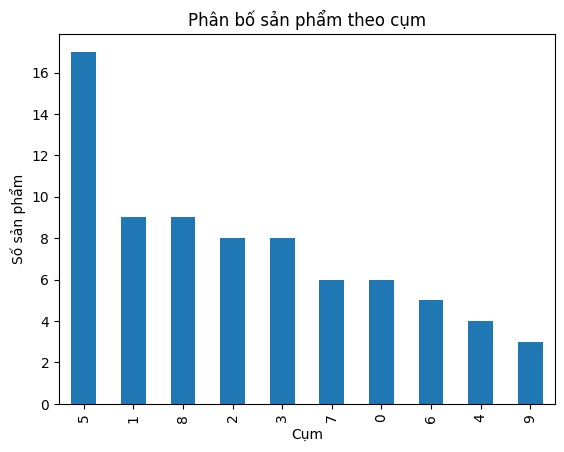

In [29]:
import matplotlib.pyplot as plt
data['cluster'].value_counts().plot(kind='bar')
plt.title('Phân bố sản phẩm theo cụm')
plt.xlabel('Cụm')
plt.ylabel('Số sản phẩm')
plt.show()

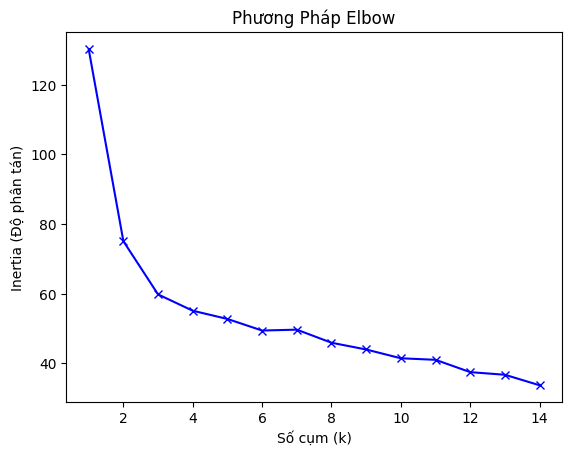

In [41]:
distortions = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)

plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia (Độ phân tán)')
plt.title('Phương Pháp Elbow')
plt.show()

In [30]:
import seaborn as sns

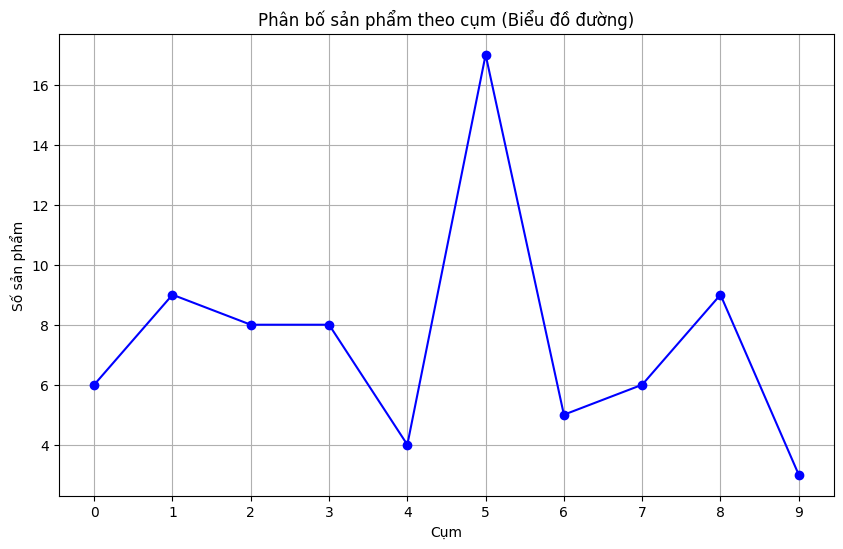

In [31]:
plt.figure(figsize=(10, 6))
cluster_counts = data['cluster'].value_counts().sort_index()
plt.plot(cluster_counts.index, cluster_counts.values, marker='o', linestyle='-', color='b')
plt.title('Phân bố sản phẩm theo cụm (Biểu đồ đường)')
plt.xlabel('Cụm')
plt.ylabel('Số sản phẩm')
plt.grid(True)
plt.xticks(cluster_counts.index)
plt.show()


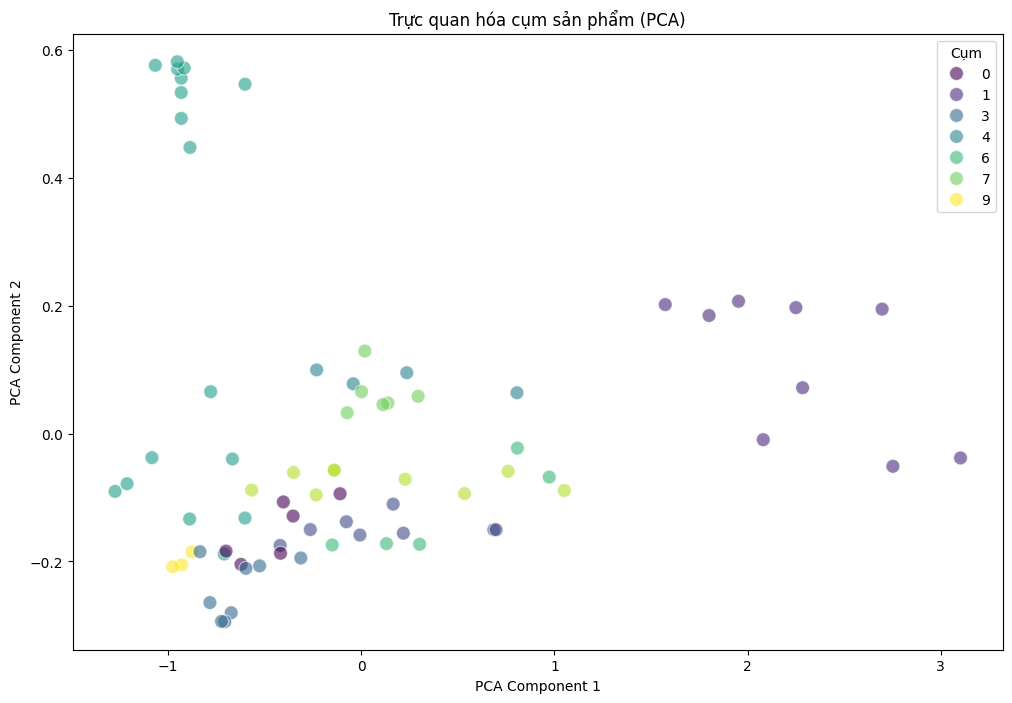

In [32]:
from sklearn.decomposition import PCA
# Biểu đồ phân tán (Scatter Plot) với PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=data['cluster'], palette='viridis', s=100, alpha=0.6)
plt.title('Trực quan hóa cụm sản phẩm (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cụm')
plt.show()

In [33]:
# Biểu đồ Silhouette (đánh giá chất lượng cụm)
silhouette_avg = silhouette_score(features, clusters)
print(f"Điểm Silhouette trung bình: {silhouette_avg:.4f}")

Điểm Silhouette trung bình: 0.1743


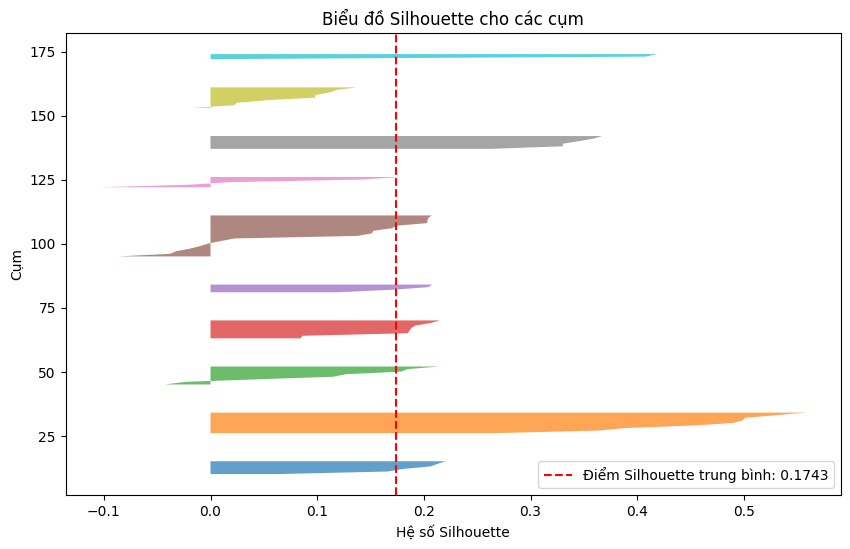

In [34]:
# Vẽ Silhouette cho từng cụm
from sklearn.metrics import silhouette_samples
silhouette_values = silhouette_samples(features, clusters)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(10):  # Giả sử n_clusters=10
    cluster_silhouette_values = silhouette_values[clusters == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Điểm Silhouette trung bình: {silhouette_avg:.4f}")
plt.title('Biểu đồ Silhouette cho các cụm')
plt.xlabel('Hệ số Silhouette')
plt.ylabel('Cụm')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Độ Tương Đồng Nội Bộ Cụm 3')

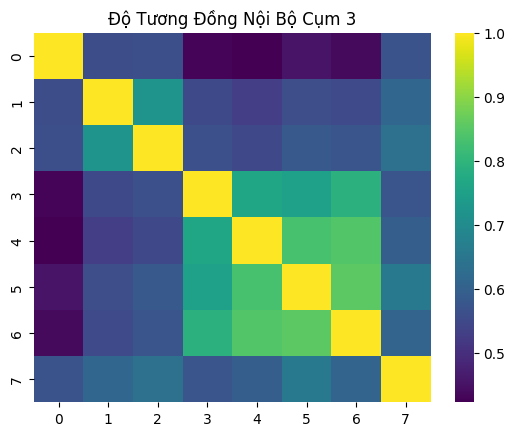

In [44]:
# Tính similarity matrix cho 1 cụm
cluster_3_data = features[clusters == 3]
similarity_matrix = cosine_similarity(cluster_3_data)

sns.heatmap(similarity_matrix, cmap='viridis')
plt.title('Độ Tương Đồng Nội Bộ Cụm 3')


# function Recommend_product

In [35]:
def recommend_products(product_ids, df, features, clusters, kmeans, top_n=5):
    recommendations = []
    
    for product_id in product_ids:
        if product_id not in df['_id'].values:
            print(f"Product ID {product_id} not found!")
            continue
        
        idx = df.index[df['_id'] == product_id].tolist()[0]
        product_cluster = clusters[idx]
        cluster_indices = np.where(clusters == product_cluster)[0]
        
        product_features = features[idx].reshape(1, -1)
        cluster_features = features[cluster_indices]
        similarities = cosine_similarity(product_features, cluster_features)[0]
        
        sorted_indices = cluster_indices[np.argsort(similarities)[::-1]]
        sorted_indices = sorted_indices[sorted_indices != idx]
        
        top_indices = sorted_indices[:top_n]
        recommended_products = df.iloc[top_indices][['_id', 'nameProduct', 'category', 'price']]
        
        recommendations.append({
            'input_product': df.iloc[idx][['nameProduct', 'category']].to_dict(),
            'recommended_products': recommended_products.to_dict('records')
        })
    
    return recommendations

In [36]:
# Danh sách productId đầu vào (thay bằng ID thực tế từ data.csv)
input_product_ids = ['68401f7c0df9292761afaf56','68401fcc0df9292761afaf58', '6840203c0df9292761afaf5a', '68401d2b0df9292761afaf46', '683f5256019f89e972887f6a']  # Ví dụ

# Lấy gợi ý
recommendations = recommend_products(input_product_ids, data, features, clusters, kmeans, top_n=5)

# Hiển thị kết quả
for rec in recommendations:
    # print(f"\nInput Product: {rec['input_product']['nameProduct']} ({rec['input_product']['category']})")
    # print("Recommended Products:")
    for i, prod in enumerate(rec['recommended_products'], 1):
        print(f"{i}.{prod['_id']} {prod['nameProduct']} ({prod['category']}, Price: {prod['price']})")

1.6840203c0df9292761afaf5a Tủ mát Hòa Phát HSR D6242 242 lít -1 cánh dàn đồng (tumat, Price: 8300000)
2.68401f410df9292761afaf54 Tủ mát Hòa Phát HSR S6195 195 lít (tumat, Price: 7100000)
3.684020880df9292761afaf5c Tủ mát Hòa Phát HSR S6280 280 lít 1 cánh (tumat, Price: 8200000)
4.68401fcc0df9292761afaf58 Tủ mát Hòa Phát HSR D6195 -195 lít 1 cánh dàn đồng (tumat, Price: 7500000)
5.6840214a0df9292761afaf5e Tủ mát Hòa Phát HSR D6280 280 lít – Dàn đồng (tumat, Price: 9200000)
1.68401f410df9292761afaf54 Tủ mát Hòa Phát HSR S6195 195 lít (tumat, Price: 7100000)
2.6840203c0df9292761afaf5a Tủ mát Hòa Phát HSR D6242 242 lít -1 cánh dàn đồng (tumat, Price: 8300000)
3.684020880df9292761afaf5c Tủ mát Hòa Phát HSR S6280 280 lít 1 cánh (tumat, Price: 8200000)
4.6840214a0df9292761afaf5e Tủ mát Hòa Phát HSR D6280 280 lít – Dàn đồng (tumat, Price: 9200000)
5.68401f7c0df9292761afaf56 Tủ mát Hòa Phát HSR S6242 – 242 lít (tumat, Price: 7600000)
1.6840214a0df9292761afaf5e Tủ mát Hòa Phát HSR D6280 280 lít 

# Đánh giá

In [39]:
import time

# Đo thời gian thực hiện tiền xử lý
start_time = time.time()
features, tfidf, scaler = preprocess_data(data)
end_time = time.time()
print(f"Thời gian tiền xử lý: {end_time - start_time:.2f} giây")

# Đo thời gian thực hiện phân cụm
start_time = time.time()
clusters, kmeans = cluster_products(features, n_clusters=10)
end_time = time.time()
print(f"Thời gian phân cụm: {end_time - start_time:.2f} giây")

# Đo thời gian thực hiện gợi ý
start_time = time.time()
recommendations = recommend_products(input_product_ids, data, features, clusters, kmeans, top_n=5)
end_time = time.time()
print(f"Thời gian gợi ý: {end_time - start_time:.2f} giây")


Thời gian tiền xử lý: 2.10 giây
Thời gian phân cụm: 0.01 giây
Thời gian gợi ý: 0.01 giây
